# WeRateDogs -- Warngling and Analyzing Data

## Gather Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data from twitter enhanced CSV file and make the 1st DataFrame

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
## Gather tweet image predictions programmatically , Download file in the same dir.
 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#test response HTTP status if succeeded

response

<Response [200]>

In [4]:
#save downloaded file into my computer 

with open(os.path.join(url.split('/')[-1]),mode = "wb") as file:
        file.write(response.content)

#test if the file successfully saved 
os.listdir()

['.ipynb_checkpoints',
 'abi_twitterDF.csv',
 'act_report.pdf',
 'image-predictions.tsv',
 'img_pred.csv',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'wrangle_report.pdf']

In [5]:
#the 2nd Dataframe 

img_pred = pd.read_csv('image-predictions.tsv', sep = "\t")

img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Accessing Project Data Without a Twitter Account

-I don't have a twitter account and after going with the steps creating account and try to get API access I still unable to get the approval , and I'm stuck.so I choosed this approach. Thanks

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
#read json file and make a Dataframe.

##df_list is empty to append 
df_list = []

with open("tweet_json.txt", encoding='utf-8') as file:
#creat a loop go through each line in the file and extract the needed data from the json txt file. 

    for i in file:
        
        data = json.loads(i)
        
        tweet_ID = data["id"]
        retw_count = data["retweet_count"]
        fav_count = data["favorite_count"]
        
        df_list.append({'tweet_ID': tweet_ID,
                        'retweet_count': retw_count,
                        'favorite_count': fav_count})



#creat the 3rd DataFram from the extracted data appended in df_list
abi_twitter = pd.DataFrame(df_list, columns = ['tweet_ID', 'retweet_count', 'favorite_count'])

#save the Dataframes into csv file & so I could assess them visually

twitter_archive.to_csv("twitter_archive.csv")
img_pred.to_csv("img_pred.csv")
abi_twitter.to_csv("abi_twitterDF.csv")

## Assess Data - Visually and Programmatically

## Quialty 
- lines 1068 , 1165 ,  1202 , 1662 , 2335 : "rating_denominator" Typo Error

- lines 1068 , 1165 ,  1202 , 1662 , 2335 : "rating_numerator" Typo Error

- 'timestamp' is a str needs to changed to datetime 

- tweet_id is a int format and there is no need to do mathematics oprations on it

- 'name' column have not valid names, count 109.

- 'name' column have None as values, count 745.

- doggo,floofer,puper, puppo colums most of them empty.

- twitter_archive contains  181 retweets.

- twitter_archive contains  78 replys.

- extrem values in rating_denominator

- extrem values rating_numerator

- twitter_archive contains missing Urls.

- img_pred Have 281 missing lines compared with twitter_archive

- 'tweet_ID' cloum in abi_twitter df (ID) is capital letters.

## Tidiness

- retweets columns not needed.
- replys columns not needed.
- abi_twitter columns retweet_count and favorite_count must be merged with twitter_archive.

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
img_pred.info()
#there are 281 lines missing compared twitter_archive 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
abi_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_ID          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [10]:
#get the values of rating_denominator

twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
#most of rating_denominator are equals 10 , so i need to unerstand the other values visually

twitter_archive[twitter_archive.rating_denominator != 10]

#returned to me that there are some typo values and there are exterme values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
twitter_archive['name'].value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Lola            10
Penny           10
Tucker          10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Toby             7
an               7
Buddy            7
Daisy            7
Koda             6
Leo              6
Dave             6
Stanley          6
Bella            6
Oscar            6
Jack             6
Jax              6
Milo             6
Rusty            6
Scout            6
George           5
              ... 
Ziva             1
Champ            1
Geno             1
Jeffrie          1
Rambo            1
Edgar            1
Andy             1
Philippe         1
Sailor           1
Ridley           1
Beckham          1
Roscoe           1
Tuck             1
Bobb             1
Ed               1
Lillie           1
Timofy           1
Bertson          1
Crumpet          1
Brownie          1
Erik             1
Amy         

In [13]:
#there are 745 None and it seems only vaild names starts with upper case

twitter_archive['name'].str.islower().value_counts()


False    2247
True      109
Name: name, dtype: int64

In [14]:
#there is 109 lowercase are not caild names 

twitter_archive['name'].loc[twitter_archive['name'].str.islower()].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
mad              2
getting          2
actually         2
not              2
unacceptable     1
old              1
space            1
light            1
such             1
by               1
all              1
officially       1
incredibly       1
my               1
infuriating      1
life             1
his              1
this             1
Name: name, dtype: int64

In [15]:
#searching for dupicates tweets
sum(twitter_archive.tweet_id.duplicated())

0

In [16]:
sum(img_pred.tweet_id.duplicated())

0

In [17]:
sum(abi_twitter.tweet_ID.duplicated())
#there is no any duplicates tweets in all Dataframes.

0

In [18]:
#since we needs only tweets to analyiz without the retweets or replys ,
#we need do discover how much lines are not original tweets

twitter_archive.in_reply_to_status_id.count()

78

In [19]:
twitter_archive.retweeted_status_id.count()

181

In [20]:
#since we need to analyis tweets with urls only , so we need to discover how many NaN values in urls 
twitter_archive.expanded_urls.count()

2297

In [21]:
sum(twitter_archive.expanded_urls.isnull())

59

In [22]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [23]:
#after Visual assement returned than the 59 NaN values are replys or retweets 
#and there is only 3 lines have missing Urls 

twitter_archive.iloc[[375,707,1445]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [24]:
#visually assess img_pred

img_pred.head(10)

#after Visualizing the DF there are predictions that are not dog breeds like box_turtle , shopping_cart.. 
#but I think it's not considered as a quality issue because I saw the urls and this algorithm is pretty much accurate
#and since it's final results if it's True or False dog breeds ...
#Finally: It's not a quailty issue

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Cleaning Data

In [25]:
#Creat Copies of the 3 Dataframes

arch_clean = twitter_archive.copy()
img_clean = img_pred.copy()
abi_clean = abi_twitter.copy()

#### Define
- replace lines 1068 , 1165 ,  1202 , 1662 , 2335 : "rating_denominator" Typo Error with the correct values from tweet text.

#### Code

In [26]:
arch_clean.loc[1068,"rating_denominator"] = 10
arch_clean.loc[1165,"rating_denominator"] = 10
arch_clean.loc[1202,"rating_denominator"] = 10
arch_clean.loc[1662,"rating_denominator"] = 10
arch_clean.loc[2335,"rating_denominator"] = 10

#### test

In [27]:
arch_clean.iloc[[1068,1165,1202,1662,2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,10,an,None,None,None,None


#### Define

- replace lines 1068 , 1165 ,  1202 , 1662 , 2335 : "rating_numerator" Typo Error with the correct values from tweet text.

#### code

In [28]:
arch_clean.loc[1068,"rating_numerator"] = 14
arch_clean.loc[1165,"rating_numerator"] = 13
arch_clean.loc[1202,"rating_numerator"] = 11
arch_clean.loc[1662,"rating_numerator"] = 10
arch_clean.loc[2335,"rating_numerator"] = 9

#### test

In [29]:
arch_clean.iloc[[1068,1165,1202,1662,2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


#### Define

- Change 'timestamp' column type from str to datetime

#### code

In [30]:
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

#### test

In [31]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define 

- change 'tweet_id' column to str format in all dataframes(no need to make oprations on it)

#### code

In [32]:
arch_clean['tweet_id'] = arch_clean.tweet_id.astype(str)
img_clean['tweet_id'] = img_clean.tweet_id.astype(str)
abi_clean['tweet_ID'] = abi_clean.tweet_ID.astype(str)

#### test

In [33]:
print(arch_clean.tweet_id.dtype)
print(img_clean.tweet_id.dtype)
print(abi_clean.tweet_ID.dtype)

object
object
object


#### Define
- delete arch_clean df retweet rows , we only analize orignal tweets. count 181

#### code

In [34]:
arch_clean = arch_clean[arch_clean.retweeted_status_id.isna()]

#### test

In [35]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

#### Define

- delete arch_clean df replys rows , we only analize orignal tweets. count 78

#### code

In [36]:
arch_clean = arch_clean[arch_clean.in_reply_to_status_id.isna()]

#### test

In [37]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

#### Define 

- change extrem values in rating_denominator to value of 10 

#### code

In [38]:
arch_clean['rating_denominator'] = 10

#### test 

In [39]:
arch_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

#### Define 

- change extrem values in rating_numerator closer to the mean which is 12

#### code

In [40]:
arch_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,0.0,0.0,0.0,0.0,2097.000000,2097.0
mean,NaN,NaN,NaN,NaN,12.182642,10.0
std,NaN,NaN,NaN,NaN,40.355310,0.0
min,NaN,NaN,NaN,NaN,0.000000,10.0
25%,NaN,NaN,NaN,NaN,10.000000,10.0
50%,NaN,NaN,NaN,NaN,11.000000,10.0
75%,NaN,NaN,NaN,NaN,12.000000,10.0
max,NaN,NaN,NaN,NaN,1776.000000,10.0


In [41]:
arch_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
24        1
26        1
165       1
60        1
44        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [42]:
# visualizing the rating_numerator 0 it was valid rating as the tweet text .
for i in arch_clean["rating_numerator"]:
    if i == 0:
        arch_clean["rating_numerator"] = arch_clean["rating_numerator"].replace([i],0)
    elif i <= 5:
        arch_clean["rating_numerator"] = arch_clean["rating_numerator"].replace([i],12)
    elif i >= 24:
        arch_clean["rating_numerator"] = arch_clean["rating_numerator"].replace([i],12)

In [43]:
arch_clean.rating_numerator.value_counts()
# now all values are closer to the mean , without the low and high extreme values

12    584
10    437
11    414
13    288
9     153
8      98
7      51
14     39
6      32
0       1
Name: rating_numerator, dtype: int64

#### Define 
- delete arch_clean rows that have missing Urls.

#### code

In [44]:
arch_clean = arch_clean[arch_clean.expanded_urls.notnull()]

#### test

In [45]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), floa

#### Define
- rename 'tweet_ID' cloumn in abi_clean df to be lower letters 

#### code

In [46]:
abi_clean.rename(columns = {'tweet_ID':'tweet_id'}, inplace = True) 

#### test

In [47]:
abi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define

- drop retweets related columns for tidiness

#### code

In [48]:
arch_clean = arch_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"],axis=1)

#### test

In [49]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2094 non-null object
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2094 non-null datetime64[ns]
source                   2094 non-null object
text                     2094 non-null object
expanded_urls            2094 non-null object
rating_numerator         2094 non-null int64
rating_denominator       2094 non-null int64
name                     2094 non-null object
doggo                    2094 non-null object
floofer                  2094 non-null object
pupper                   2094 non-null object
puppo                    2094 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 245.4+ KB


#### Define

- drop replys related columns for tidiness

#### code

In [50]:
arch_clean = arch_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id"],axis=1)

#### test

In [51]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


In [52]:
arch_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Define

- merge abi_clean columns retweet_count and favorite_count with arch_clean. and have only 2 DF (arch_clean,img_clean)

#### code

In [53]:
arch_clean = pd.merge(arch_clean, abi_clean, on='tweet_id', how='left')

#### test

In [54]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 14 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2094 non-null int64
favorite_count        2094 non-null int64
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 245.4+ KB


In [55]:
arch_clean.tail(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
2084,666058600524156928,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None,61,115
2085,666057090499244032,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None,146,304
2086,666055525042405380,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None,261,448
2087,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,12,10,an,None,None,None,None,879,1253
2088,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None,60,136
2089,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,12,10,None,None,None,None,None,41,111
2090,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,147,311
2091,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,47,128
2092,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,48,132
2093,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,532,2535


# Storing Data

In [56]:
# save the final DF as twitter_archive_master.csv as requisted

arch_clean.to_csv("twitter_archive_master.csv")

# Analyzing, and Visualizing Data

In [57]:
arch_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2094.000000,2094.0,2094.000000,2094.000000
mean,10.936008,10.0,2844.039160,8987.330468
std,1.656536,0.0,4712.115669,12207.002968
min,0.000000,10.0,16.000000,81.000000
25%,10.000000,10.0,644.500000,2045.250000
50%,11.000000,10.0,1404.000000,4195.500000
75%,12.000000,10.0,3289.500000,11443.000000
max,14.000000,10.0,79515.000000,132810.000000


### Getting an idea about the distrbution of ratings given.

In [58]:
arch_clean["rating_numerator"].describe()

count    2094.000000
mean       10.936008
std         1.656536
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [59]:
arch_clean["rating_numerator"].mode()

0    12
dtype: int64

In [60]:
arch_clean["rating_numerator"].median()

11.0

In [61]:
arch_clean["rating_numerator"].mean()

10.936007640878701

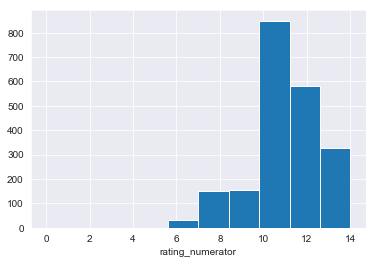

In [62]:
arch_clean["rating_numerator"].hist() 

plt.xlabel("rating_numerator");

### As shown above the distbution is left skewed , and the average of ratings givin is 10.9 and the most of ratings are between 10 to 12.

### Find the correlation betweeen timestamp and the retweets and favorite

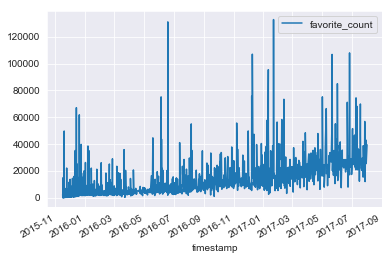

In [63]:
arch_clean.plot(x= "timestamp",y = "favorite_count" , kind="line") ;

### This shows incress in the numbers of favorite count with time , and notice here the peak of favorites at july16 and between feb17 and mar17

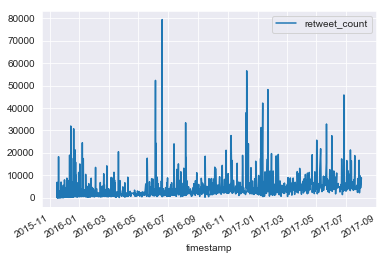

In [64]:
arch_clean.plot(x= "timestamp",y = "retweet_count" ) ;

### Once again we still have slightly increse of retweets over time , the first peak still around july16 ,but the secound peak not as powerful as the one occured in favorites between feb 17 and march 

### Find the correlation betweeen retweets and favorite

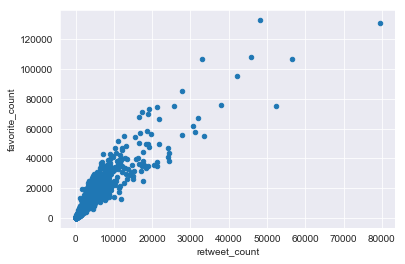

In [65]:
arch_clean.plot(x= "retweet_count",y = "favorite_count" , kind="scatter") ;

### As shown that there are positive correlation between retweets and favorite.

### Find the correlation between ratings , favorite count , retweet count.

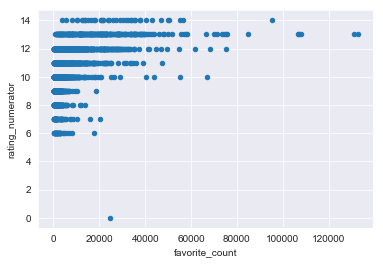

In [66]:
arch_clean.plot(x ="favorite_count", y="rating_numerator" , kind="scatter" ) ;

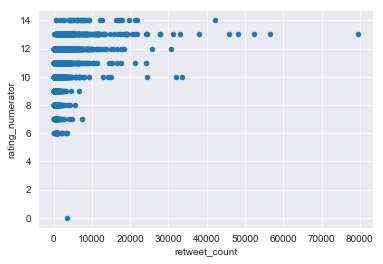

In [67]:
arch_clean.plot(x ="retweet_count", y="rating_numerator" , kind="scatter" ) ;

### As Shown above the corrlation between ratings ,retweets and favorites are positve, and the ratings given more slightly above the mode have the most retweets and favorites.